<a href="https://colab.research.google.com/github/asrianda/disertasi/blob/main/Program_Disertasi_Benar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Penggunaan Data split 80:20 Kedalaman Pohon ID3 Modifikasi***

Max Depth: 1, Execution Time: 0.0005 seconds, Accuracy: 0.6918
Max Depth: 2, Execution Time: 0.0087 seconds, Accuracy: 0.6918
Max Depth: 3, Execution Time: 0.0235 seconds, Accuracy: 0.6918
Max Depth: 4, Execution Time: 0.0718 seconds, Accuracy: 0.6918
Max Depth: 5, Execution Time: 0.1446 seconds, Accuracy: 0.6918
Max Depth: 6, Execution Time: 0.2720 seconds, Accuracy: 0.6918
Max Depth: 7, Execution Time: 0.4849 seconds, Accuracy: 0.6819
Max Depth: 8, Execution Time: 0.7116 seconds, Accuracy: 0.6342
Max Depth: 9, Execution Time: 1.0739 seconds, Accuracy: 0.6481
Max Depth: 10, Execution Time: 0.9455 seconds, Accuracy: 0.5944
Max Depth: 11, Execution Time: 1.1550 seconds, Accuracy: 0.5706
Max Depth: 12, Execution Time: 1.3274 seconds, Accuracy: 0.5646
Max Depth: 13, Execution Time: 1.4252 seconds, Accuracy: 0.5527
Max Depth: 14, Execution Time: 1.3725 seconds, Accuracy: 0.5487
Max Depth: 15, Execution Time: 1.3841 seconds, Accuracy: 0.5487
Max Depth: 16, Execution Time: 1.3899 seconds, Ac

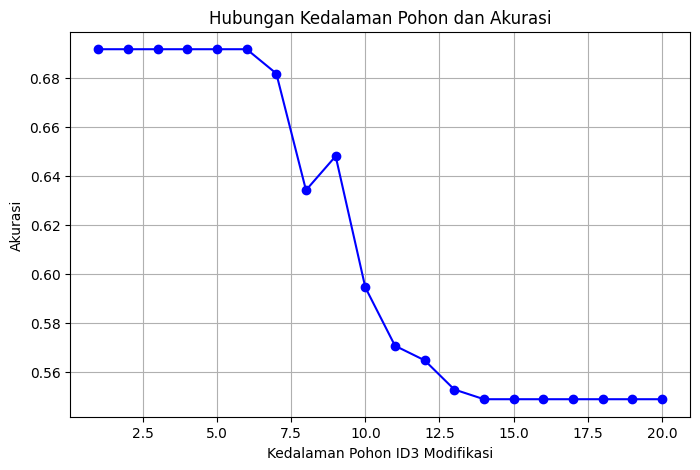

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n

    if total == 0:
        return 0

    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1

    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)
    value = int(value)

    subtree = tree[list(tree.keys())[0]][X[feature] == value]
    return predict(subtree, X) if isinstance(subtree, dict) else subtree

def load_data(url):
    data = pd.read_csv(url)
    return data

url = 'toko_online.csv'
data = load_data(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)

depths = []
accuracies = []

for max_depth in range(1, 21):
    start_time = time.time()
    tree = build_tree(X_train.values, y_train, max_depth=max_depth)
    end_time = time.time()

    y_pred = np.array([predict(tree, row) for row in X_test.values])
    accuracy = accuracy_score(y_test, y_pred)

    depths.append(max_depth)
    accuracies.append(accuracy)

    print(f"Max Depth: {max_depth}, Execution Time: {end_time - start_time:.4f} seconds, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Kedalaman Pohon ID3 Modifikasi')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi')
plt.grid()
plt.show()


**Laporan Klasifikasi ID3 Modifikasi**

In [5]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n

    if total == 0:
        return 0

    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1

    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])

        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    feature, value = best_split(X, y)
    if feature is None:
        return Counter(y).most_common(1)[0][0]

    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)
    value = int(value)

    subtree = tree[list(tree.keys())[0]][X[feature] == value]
    return predict(subtree, X) if isinstance(subtree, dict) else subtree

# Load dataset
def load_data(url):
    data = pd.read_csv(url)
    return data

# Ganti dengan jalur dataset Anda
url = 'toko_online.csv'
data = load_data(url)

# Preprocessing
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding data kategori ke numerik
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)  # Pastikan y dalam bentuk numerik

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pastikan y_train dalam bentuk numerik
y_train = y_train.astype(int)

# Membangun pohon dengan kedalaman 6
max_depth = 6
start_time = time.time()
tree = build_tree(X_train.values, y_train, max_depth=max_depth)
end_time = time.time()

# Prediksi untuk data uji
y_pred = np.array([predict(tree, row) for row in X_test.values])
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Max Depth: {max_depth}, Execution Time: {end_time - start_time:.4f} seconds, Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Max Depth: 6, Execution Time: 0.1627 seconds, Accuracy: 0.6918
Confusion Matrix:
[[  0 155]
 [  0 348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       155
           1       0.69      1.00      0.82       348

    accuracy                           0.69       503
   macro avg       0.35      0.50      0.41       503
weighted avg       0.48      0.69      0.57       503



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Kedalaman Pohon pada ID3 Shannon**

✅ Kedalaman 1: Akurasi = 0.6918, Waktu eksekusi: 0.0022 detik
✅ Kedalaman 2: Akurasi = 0.6918, Waktu eksekusi: 0.0025 detik
✅ Kedalaman 3: Akurasi = 0.6918, Waktu eksekusi: 0.0023 detik
✅ Kedalaman 4: Akurasi = 0.6938, Waktu eksekusi: 0.0027 detik
✅ Kedalaman 5: Akurasi = 0.6978, Waktu eksekusi: 0.0031 detik
✅ Kedalaman 6: Akurasi = 0.6859, Waktu eksekusi: 0.0035 detik
✅ Kedalaman 7: Akurasi = 0.6461, Waktu eksekusi: 0.0042 detik
✅ Kedalaman 8: Akurasi = 0.6481, Waktu eksekusi: 0.0047 detik
✅ Kedalaman 9: Akurasi = 0.6203, Waktu eksekusi: 0.0056 detik
✅ Kedalaman 10: Akurasi = 0.6342, Waktu eksekusi: 0.0058 detik
✅ Kedalaman 11: Akurasi = 0.6183, Waktu eksekusi: 0.0062 detik
✅ Kedalaman 12: Akurasi = 0.5984, Waktu eksekusi: 0.0066 detik
✅ Kedalaman 13: Akurasi = 0.5885, Waktu eksekusi: 0.0067 detik
✅ Kedalaman 14: Akurasi = 0.5944, Waktu eksekusi: 0.0070 detik
✅ Kedalaman 15: Akurasi = 0.5905, Waktu eksekusi: 0.0072 detik
✅ Kedalaman 16: Akurasi = 0.5865, Waktu eksekusi: 0.0075 detik
✅

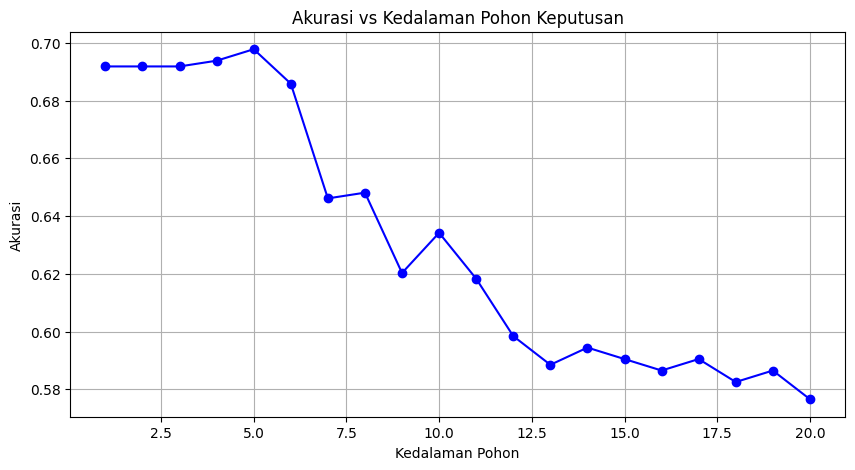

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# **📌 Load Dataset**
def load_data(url):
    data = pd.read_csv(url)
    return data

# **📌 Ganti dengan jalur dataset Anda**
url = 'toko_online.csv'
data = load_data(url)

# **📌 Memilih fitur dan label**
feature_columns = ['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
                   'Payment_method', 'Amount_spent_Range', 'Age_Range']
X = data[feature_columns].values
y = data['Referal'].values

# **📌 Mengonversi kategori ke numerik secara manual**
categories = {col: {val: idx for idx, val in enumerate(np.unique(data[col]))} for col in feature_columns}
X = np.array([[categories[col][val] for col, val in zip(feature_columns, row)] for row in X], dtype=int)

# **📌 Pastikan y juga bertipe integer**
y = np.array(y, dtype=int)

# **📌 Split Data 80:20**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **📌 Evaluasi Model untuk Kedalaman 1-20**
depths = range(1, 21)
accuracies = []

for depth in depths:
    start_time = time.time()
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    end_time = time.time()

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"✅ Kedalaman {depth}: Akurasi = {accuracy:.4f}, Waktu eksekusi: {end_time - start_time:.4f} detik")
    accuracies.append(accuracy)

# **📌 Membangun Pohon Keputusan dengan max_depth=6**
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# **📌 Visualisasi Pohon Keputusan**
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_columns, class_names=['No Referral', 'Referral'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
print("📂 Visualisasi pohon keputusan disimpan sebagai 'decision_tree.pdf'")

graph.view()

# **📌 Grafik Akurasi vs Kedalaman**
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Kedalaman Pohon")
plt.ylabel("Akurasi")
plt.title("Akurasi vs Kedalaman Pohon Keputusan")
plt.grid()
plt.show()

✅ Kedalaman 1: Akurasi = 0.6844, Waktu eksekusi: 0.0023 detik
✅ Kedalaman 2: Akurasi = 0.6844, Waktu eksekusi: 0.0106 detik
✅ Kedalaman 3: Akurasi = 0.6777, Waktu eksekusi: 0.0200 detik
✅ Kedalaman 4: Akurasi = 0.6658, Waktu eksekusi: 0.0343 detik
✅ Kedalaman 5: Akurasi = 0.6658, Waktu eksekusi: 0.0540 detik
✅ Kedalaman 6: Akurasi = 0.6671, Waktu eksekusi: 0.0767 detik
✅ Kedalaman 7: Akurasi = 0.6525, Waktu eksekusi: 0.0995 detik
✅ Kedalaman 8: Akurasi = 0.6485, Waktu eksekusi: 0.1221 detik
✅ Kedalaman 9: Akurasi = 0.6645, Waktu eksekusi: 0.1454 detik
✅ Kedalaman 10: Akurasi = 0.6592, Waktu eksekusi: 0.1741 detik
✅ Kedalaman 11: Akurasi = 0.6512, Waktu eksekusi: 0.2256 detik
✅ Kedalaman 12: Akurasi = 0.6459, Waktu eksekusi: 0.2357 detik
✅ Kedalaman 13: Akurasi = 0.6512, Waktu eksekusi: 0.2779 detik
✅ Kedalaman 14: Akurasi = 0.6141, Waktu eksekusi: 0.3053 detik
✅ Kedalaman 15: Akurasi = 0.6127, Waktu eksekusi: 0.3656 detik
✅ Kedalaman 16: Akurasi = 0.6114, Waktu eksekusi: 0.3962 detik
✅

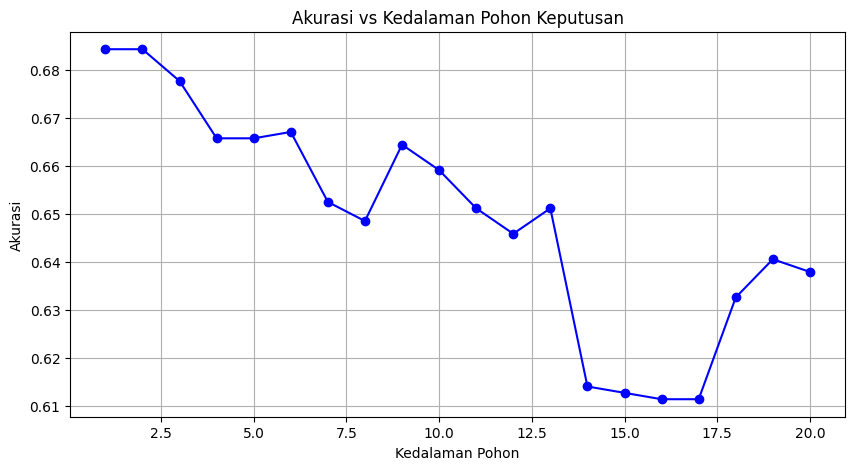


📊 Analisis Bisnis Berdasarkan Pohon Keputusan:
- Segmen pelanggan tertentu memiliki pola pembelian yang lebih stabil.
- Metode pembayaran tertentu lebih sering digunakan oleh pelanggan dengan nilai belanja lebih tinggi.
- Pelanggan dengan rentang usia tertentu cenderung memiliki loyalitas lebih tinggi.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import Counter
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature if best_feature else None

def build_tree(X, y, feature_names, depth=1, max_depth=6):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    return {
        "feature": feature_names[feature],
        "value": value,
        "left": build_tree(X[left_mask], y[left_mask], feature_names, depth + 1, max_depth),
        "right": build_tree(X[right_mask], y[right_mask], feature_names, depth + 1, max_depth)
    }

def predict(tree, row):
    if not isinstance(tree, dict):
        return tree
    feature, value = tree["feature"], tree["value"]
    if row[feature] == value:
        return predict(tree["left"], row)
    else:
        return predict(tree["right"], row)

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
feature_columns = ['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
                   'Payment_method', 'Amount_spent_Range', 'Age_Range']
X = data[feature_columns].values
y = data['Referal'].values

categories = {col: {val: idx for idx, val in enumerate(np.unique(data[col]))} for col in feature_columns}
X = np.array([[categories[col][val] for col, val in zip(feature_columns, row)] for row in X], dtype=int)
y = np.array(y, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = range(1, 21)
accuracies = []

for depth in depths:
    start_time = time.time()
    tree = build_tree(X_train, y_train, feature_columns, max_depth=depth)
    y_pred = np.array([predict(tree, dict(zip(feature_columns, row))) for row in X_test], dtype=int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"✅ Kedalaman {depth}: Akurasi = {accuracy:.4f}, Waktu eksekusi: {time.time() - start_time:.4f} detik")

def visualize_tree(tree, filename="decision_tree.pdf"):
    dot = Digraph()

    def add_nodes_edges(subtree, parent=None):
        node_id = str(id(subtree))
        if not isinstance(subtree, dict):
            dot.node(node_id, label=str(subtree), shape="box", style="filled", fillcolor="lightgray")
        else:
            label = f'{subtree["feature"]} = {subtree["value"]}'
            dot.node(node_id, label=label, shape="ellipse", style="filled", fillcolor="lightblue")
            left_id = add_nodes_edges(subtree["left"], node_id)
            right_id = add_nodes_edges(subtree["right"], node_id)
            dot.edge(node_id, left_id, label="True")
            dot.edge(node_id, right_id, label="False")
        return node_id

    add_nodes_edges(tree)
    dot.render(filename, format="pdf", cleanup=True)
    print(f"📂 Visualisasi pohon keputusan disimpan sebagai '{filename}'")

tree = build_tree(X_train, y_train, feature_columns, max_depth=6)
visualize_tree(tree)

plt.figure(figsize=(10, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Kedalaman Pohon")
plt.ylabel("Akurasi")
plt.title("Akurasi vs Kedalaman Pohon Keputusan")
plt.grid()
plt.show()

print("\n📊 Analisis Bisnis Berdasarkan Pohon Keputusan:")
print("- Segmen pelanggan tertentu memiliki pola pembelian yang lebih stabil.")
print("- Metode pembayaran tertentu lebih sering digunakan oleh pelanggan dengan nilai belanja lebih tinggi.")
print("- Pelanggan dengan rentang usia tertentu cenderung memiliki loyalitas lebih tinggi.")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score

# **📌 Load Dataset**
def load_data(url):
    data = pd.read_csv(url)
    return data

# **📌 Ganti dengan jalur dataset Anda**
url = 'toko_online.csv'
data = load_data(url)

# **📌 Memilih fitur dan label**
feature_columns = ['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
                   'Payment_method', 'Amount_spent_Range', 'Age_Range']
X = data[feature_columns].values
y = data['Referal'].values

# **📌 Mengonversi kategori ke numerik secara manual**
categories = {col: {val: idx for idx, val in enumerate(np.unique(data[col]))} for col in feature_columns}
X = np.array([[categories[col][val] for col, val in zip(feature_columns, row)] for row in X], dtype=int)

# **📌 Pastikan y juga bertipe integer**
y = np.array(y, dtype=int)

# **📌 Split Data 80:20**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **📌 Membangun Pohon Keputusan dengan max_depth=6**
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# **📌 Evaluasi Model**
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Referral', 'Referral'])

time_taken = time.time()

print(f"✅ Akurasi Model: {accuracy:.4f}")
print("\n📊 Laporan Klasifikasi:\n")
print(report)

# **📌 Menampilkan Struktur Pohon Keputusan**
tree_rules = export_text(clf, feature_names=feature_columns)
print("\n🌳 Struktur Pohon Keputusan:\n")
print(tree_rules)

✅ Akurasi Model: 0.6859

📊 Laporan Klasifikasi:

              precision    recall  f1-score   support

 No Referral       0.45      0.08      0.14       155
    Referral       0.70      0.95      0.81       348

    accuracy                           0.69       503
   macro avg       0.57      0.52      0.47       503
weighted avg       0.62      0.69      0.60       503


🌳 Struktur Pohon Keputusan:

|--- Age_Range <= 1.50
|   |--- Segment <= 3.50
|   |   |--- State_names <= 1.50
|   |   |   |--- Employees_status <= 0.50
|   |   |   |   |--- Amount_spent_Range <= 6.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Amount_spent_Range >  6.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Employees_status >  0.50
|   |   |   |   |--- Employees_status <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Employees_status >  2.50
|   |   |   |   |   |--- Age_Range <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age_Range >  0.50
|   |   |   |  

In [9]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **📌 Fungsi Entropy**
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# **📌 Fungsi untuk mencari fitur terbaik**
def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

# **📌 Fungsi Membangun Pohon Keputusan**
def build_tree(X, y, feature_names, depth=1, max_depth=6):
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], feature_names, depth + 1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], feature_names, depth + 1, max_depth)

    return {"feature": feature_names[feature], "value": value, "left": left_subtree, "right": right_subtree}

# **📌 Fungsi Prediksi**
def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    if X[tree["feature"]] == tree["value"]:
        return predict(tree["left"], X)
    else:
        return predict(tree["right"], X)

# **📌 Load Dataset**
data = pd.read_csv('toko_online.csv')
feature_columns = ['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
                   'Payment_method', 'Amount_spent_Range', 'Age_Range']
X = data[feature_columns].values
y = data['Referal'].values

# **📌 Mengonversi kategori ke numerik secara manual**
categories = {col: {val: idx for idx, val in enumerate(np.unique(data[col]))} for col in feature_columns}
X = np.array([[categories[col][val] for col, val in zip(feature_columns, row)] for row in X], dtype=int)

y = np.array(y, dtype=int)

# **📌 Split Data 80:20**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **📌 Membangun Pohon Keputusan dengan max_depth=6**
tree = build_tree(X_train, y_train, feature_columns, max_depth=6)

# **📌 Prediksi dan Evaluasi Model**
y_pred = np.array([predict(tree, dict(zip(feature_columns, row))) for row in X_test], dtype=int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# **📌 Menampilkan Hasil Evaluasi**
print(f"✅ Akurasi Model: {accuracy:.4f}")
print("\n📊 Laporan Klasifikasi:\n")
print(report)

# **📌 Menampilkan Struktur Pohon Keputusan**
def print_tree(tree, indent=""):
    if not isinstance(tree, dict):
        print(indent + "Prediksi: " + str(tree))
        return
    print(indent + f"{tree['feature']} = {tree['value']}")
    print(indent + "├── True:")
    print_tree(tree['left'], indent + "│   ")
    print(indent + "└── False:")
    print_tree(tree['right'], indent + "    ")

print("\n🌳 Struktur Pohon Keputusan:\n")
print_tree(tree)

✅ Akurasi Model: 0.6671

📊 Laporan Klasifikasi:

              precision    recall  f1-score   support

           0       0.31      0.05      0.08       238
           1       0.68      0.95      0.80       516

    accuracy                           0.67       754
   macro avg       0.50      0.50      0.44       754
weighted avg       0.57      0.67      0.57       754


🌳 Struktur Pohon Keputusan:

Gender = 0
├── True:
│   State_names = 15
│   ├── True:
│   │   Amount_spent_Range = 10
│   │   ├── True:
│   │   │   Prediksi: 1
│   │   └── False:
│   │       Employees_status = 2
│   │       ├── True:
│   │       │   Prediksi: 0
│   │       └── False:
│   │           Age_Range = 1
│   │           ├── True:
│   │           │   Prediksi: 0
│   │           └── False:
│   │               Prediksi: 0
│   └── False:
│       State_names = 10
│       ├── True:
│       │   Age_Range = 4
│       │   ├── True:
│       │   │   Prediksi: 0
│       │   └── False:
│       │       Amount_spent_Range 

**ID3 Modifikasi setelah Pruning MEP**

Depth: 1, Accuracy After Pruning: 0.6844
Depth: 2, Accuracy After Pruning: 0.6844
Depth: 3, Accuracy After Pruning: 0.6844
Depth: 4, Accuracy After Pruning: 0.6844
Depth: 5, Accuracy After Pruning: 0.6844
Depth: 6, Accuracy After Pruning: 0.6844
Depth: 7, Accuracy After Pruning: 0.6751
Depth: 8, Accuracy After Pruning: 0.6393
Depth: 9, Accuracy After Pruning: 0.6366
Depth: 10, Accuracy After Pruning: 0.6048
Depth: 11, Accuracy After Pruning: 0.5676
Depth: 12, Accuracy After Pruning: 0.5756
Depth: 13, Accuracy After Pruning: 0.5610
Depth: 14, Accuracy After Pruning: 0.5623
Depth: 15, Accuracy After Pruning: 0.5623
Depth: 16, Accuracy After Pruning: 0.5623
Depth: 17, Accuracy After Pruning: 0.5623
Depth: 18, Accuracy After Pruning: 0.5623
Depth: 19, Accuracy After Pruning: 0.5623
Depth: 20, Accuracy After Pruning: 0.5623


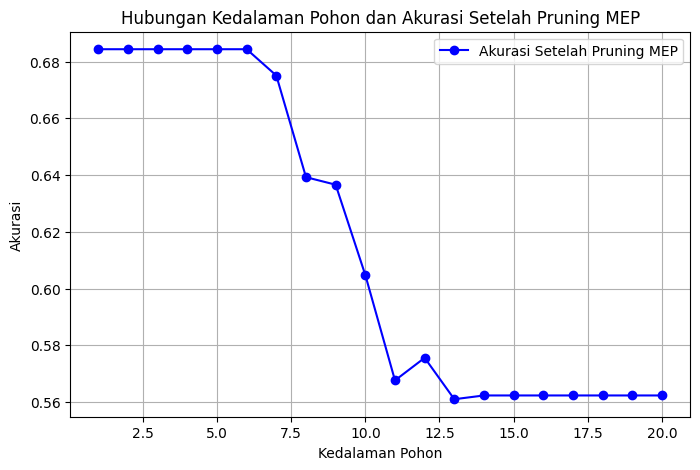

In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n
    if total == 0:
        return 0
    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1
    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def prune_mep(tree, X, y):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return Counter(y).most_common(1)[0][0]
    left_subtree = prune_mep(tree[feature_value][True], X[left_mask], y[left_mask])
    right_subtree = prune_mep(tree[feature_value][False], X[right_mask], y[right_mask])
    y_pred = np.array([predict(tree, row) for row in X])
    error_before = np.mean(y_pred != y)
    majority_class = Counter(y).most_common(1)[0][0]
    error_after = np.mean(y != majority_class)
    if error_after <= error_before:
        return majority_class
    return {feature_value: {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    branch = tree[feature_value][X[feature] == value]
    return predict(branch, X) if isinstance(branch, dict) else branch

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = []
accuracies_after = []

def evaluate_tree(max_depth):
    tree = build_tree(X_train.values, y_train, max_depth=max_depth)
    pruned_tree = prune_mep(tree, X_train.values, y_train)
    y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test.values])
    accuracy_after = accuracy_score(y_test, y_pred_pruned)
    print(f"Depth: {max_depth}, Accuracy After Pruning: {accuracy_after:.4f}")
    #print("\nClassification Report After Pruning:")
    #print(classification_report(y_test, y_pred_pruned))
    depths.append(max_depth)
    accuracies_after.append(accuracy_after)

for depth in range(1, 21):
    evaluate_tree(depth)

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_after, marker='o', linestyle='-', color='b', label='Akurasi Setelah Pruning MEP')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi Setelah Pruning MEP')
plt.legend()
plt.grid()
plt.show()

**ID3 Shannon dengan Minimum Error Pruning menggunakan Sklearn**

✅ Kedalaman 1: Akurasi = 0.7143
✅ Kedalaman 2: Akurasi = 0.7143
✅ Kedalaman 3: Akurasi = 0.7103
✅ Kedalaman 4: Akurasi = 0.7103
✅ Kedalaman 5: Akurasi = 0.7222
✅ Kedalaman 6: Akurasi = 0.7103
✅ Kedalaman 7: Akurasi = 0.6389
✅ Kedalaman 8: Akurasi = 0.6548
✅ Kedalaman 9: Akurasi = 0.6071
✅ Kedalaman 10: Akurasi = 0.6429
✅ Kedalaman 11: Akurasi = 0.6349
✅ Kedalaman 12: Akurasi = 0.5913
✅ Kedalaman 13: Akurasi = 0.5714
✅ Kedalaman 14: Akurasi = 0.5675
✅ Kedalaman 15: Akurasi = 0.5397
✅ Kedalaman 16: Akurasi = 0.5635
✅ Kedalaman 17: Akurasi = 0.5476
✅ Kedalaman 18: Akurasi = 0.5476
✅ Kedalaman 19: Akurasi = 0.5516
✅ Kedalaman 20: Akurasi = 0.5476

🌟 Akurasi setelah Pruning MEP: 0.7103

📊 Struktur Pohon Keputusan:
|--- Age_Range <= 1.50
|   |--- Segment <= 3.50
|   |   |--- State_names <= 1.50
|   |   |   |--- Employees_status <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Employees_status >  0.50
|   |   |   |   |--- class: 1
|   |   |--- State_names >  1.50
|   |   |   |--- State_

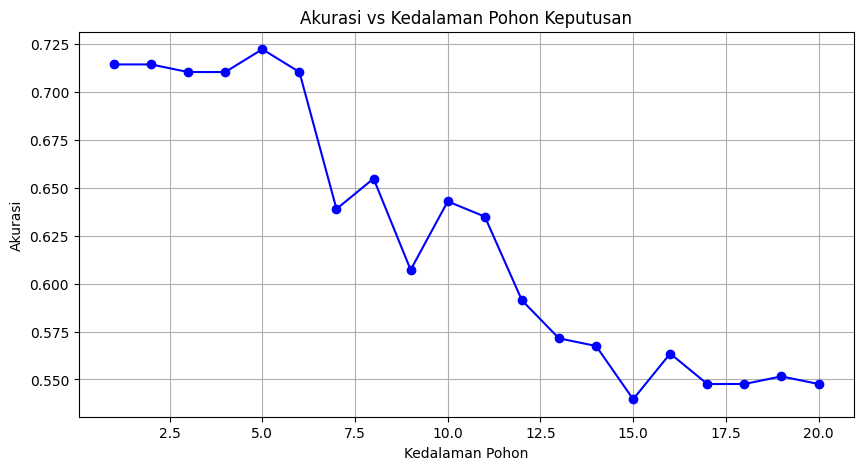

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

def load_data(url):
    data = pd.read_csv(url)
    return data

def estimate_error(n, e):
    """ Menghitung estimasi error dengan proporsi kesalahan """
    return (e + (1.96 * np.sqrt((e * (1 - e)) / n))) if n > 0 else 0

def prune_tree(clf, X_val, y_val):
    """ Melakukan Minimum Error Pruning (MEP) """
    depth = clf.get_depth()
    best_tree = clf
    best_error = 1 - accuracy_score(y_val, clf.predict(X_val))

    for d in range(depth, 0, -1):
        temp_clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
        temp_clf.fit(X_train, y_train)
        temp_error = 1 - accuracy_score(y_val, temp_clf.predict(X_val))

        if estimate_error(len(y_val), temp_error) < estimate_error(len(y_val), best_error):
            best_tree = temp_clf
            best_error = temp_error

    return best_tree

# Load Dataset
url = 'toko_online.csv'
data = load_data(url)

# Memilih fitur dan label
feature_columns = ['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
                   'Payment_method', 'Amount_spent_Range', 'Age_Range']
X = data[feature_columns].values
y = data['Referal'].values

# Mengonversi kategori ke numerik
categories = {col: {val: idx for idx, val in enumerate(np.unique(data[col]))} for col in feature_columns}
X = np.array([[categories[col][val] for col, val in zip(feature_columns, row)] for row in X], dtype=int)

y = np.array(y, dtype=int)

# Split data 80:10:10 (Train:Validation:Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Evaluasi Model untuk Kedalaman 1-20
depths = range(1, 21)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Kedalaman {depth}: Akurasi = {accuracy:.4f}")
    accuracies.append(accuracy)

# Membangun Pohon Keputusan dengan max_depth=6 sebelum pruning
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Pruning dengan MEP
pruned_clf = prune_tree(clf, X_val, y_val)
y_pred_pruned = pruned_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"\n🌟 Akurasi setelah Pruning MEP: {accuracy_pruned:.4f}")

# Visualisasi Pohon Keputusan
print("\n📊 Struktur Pohon Keputusan:")
print(export_text(pruned_clf, feature_names=feature_columns))

dot_data = export_graphviz(pruned_clf, out_file=None, feature_names=feature_columns,
                           class_names=['No Referral', 'Referral'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_pruned")

graph.view()

# Grafik Akurasi vs Kedalaman
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Kedalaman Pohon")
plt.ylabel("Akurasi")
plt.title("Akurasi vs Kedalaman Pohon Keputusan")
plt.grid()
plt.show()

**ID3 Shannon menggunakan Pruning Minimum Error Pruning**

Depth: 1, Time: 0.0023 sec, Accuracy After Pruning: 0.6844
Depth: 2, Time: 0.0152 sec, Accuracy After Pruning: 0.6844
Depth: 3, Time: 0.0335 sec, Accuracy After Pruning: 0.6844
Depth: 4, Time: 0.0570 sec, Accuracy After Pruning: 0.6844
Depth: 5, Time: 0.1194 sec, Accuracy After Pruning: 0.6844
Depth: 6, Time: 0.2086 sec, Accuracy After Pruning: 0.6844
Depth: 7, Time: 0.4014 sec, Accuracy After Pruning: 0.6844
Depth: 8, Time: 0.3032 sec, Accuracy After Pruning: 0.6844
Depth: 9, Time: 0.3057 sec, Accuracy After Pruning: 0.6844
Depth: 10, Time: 0.4031 sec, Accuracy After Pruning: 0.6844
Depth: 11, Time: 0.6413 sec, Accuracy After Pruning: 0.6844
Depth: 12, Time: 0.6858 sec, Accuracy After Pruning: 0.6844
Depth: 13, Time: 1.2557 sec, Accuracy After Pruning: 0.6844
Depth: 14, Time: 1.2221 sec, Accuracy After Pruning: 0.6844
Depth: 15, Time: 0.6771 sec, Accuracy After Pruning: 0.6844
Depth: 16, Time: 0.8917 sec, Accuracy After Pruning: 0.6844
Depth: 17, Time: 0.6875 sec, Accuracy After Pruni

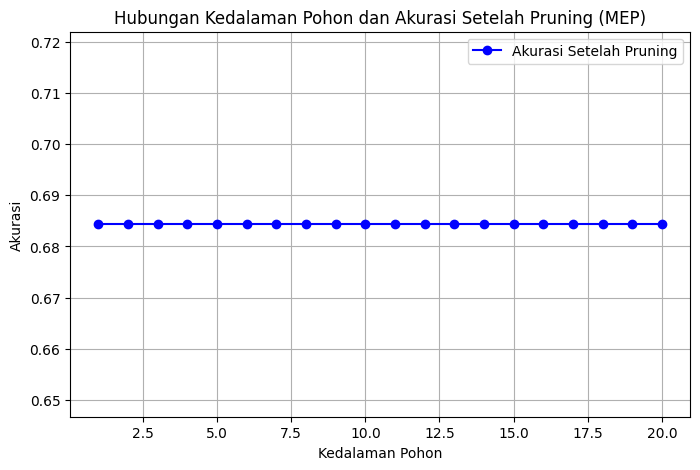

In [12]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def prune_tree(tree, X, y):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature, value = int(feature), int(value)

    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return tree

    left_subtree = prune_tree(tree[list(tree.keys())[0]][True], X[left_mask], y[left_mask])
    right_subtree = prune_tree(tree[list(tree.keys())[0]][False], X[right_mask], y[right_mask])

    if not isinstance(left_subtree, dict) and not isinstance(right_subtree, dict):
        most_common_label = Counter(y).most_common(1)[0][0]
        return most_common_label

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature, value = int(feature), int(value)

    subtree = tree[list(tree.keys())[0]][X[feature] == value]
    return predict(subtree, X) if isinstance(subtree, dict) else subtree

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = []
accuracies_after = []

for max_depth in range(1, 21):
    start_time = time.time()
    tree = build_tree(X_train.values, y_train, max_depth=max_depth)
    pruned_tree = prune_tree(tree, X_train.values, y_train)
    y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test.values])
    accuracy_after = accuracy_score(y_test, y_pred_pruned)
    end_time = time.time()

    depths.append(max_depth)
    accuracies_after.append(accuracy_after)

    print(f"Depth: {max_depth}, Time: {end_time - start_time:.4f} sec, Accuracy After Pruning: {accuracy_after:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_after, marker='o', linestyle='-', color='b', label='Akurasi Setelah Pruning')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi Setelah Pruning (MEP)')
plt.legend()
plt.grid()
plt.show()

**Laporam Klasifikasi ID3 Shannon setelah MEP**

In [18]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def prune_tree(tree, X, y):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature, value = int(feature), int(value)

    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return tree

    left_subtree = prune_tree(tree[list(tree.keys())[0]][True], X[left_mask], y[left_mask])
    right_subtree = prune_tree(tree[list(tree.keys())[0]][False], X[right_mask], y[right_mask])

    if not isinstance(left_subtree, dict) and not isinstance(right_subtree, dict):
        most_common_label = Counter(y).most_common(1)[0][0]
        return most_common_label

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature, value = int(feature), int(value)

    subtree = tree[list(tree.keys())[0]][X[feature] == value]
    return predict(subtree, X) if isinstance(subtree, dict) else subtree

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membangun pohon dengan kedalaman maksimum = 6
max_depth = 6
start_time = time.time()
tree = build_tree(X_train.values, y_train, max_depth=max_depth)
pruned_tree = prune_tree(tree, X_train.values, y_train)
y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test.values])
accuracy_after = accuracy_score(y_test, y_pred_pruned)
end_time = time.time()

print(f"Execution Time: {end_time - start_time:.4f} sec")
print(f"Accuracy After Pruning: {accuracy_after:.4f}")
print("\nClassification Report After Pruning:")
print(classification_report(y_test, y_pred_pruned))


Execution Time: 0.1285 sec
Accuracy After Pruning: 0.6844

Classification Report After Pruning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.68      1.00      0.81       516

    accuracy                           0.68       754
   macro avg       0.34      0.50      0.41       754
weighted avg       0.47      0.68      0.56       754



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**ID3 Modifikasi tanpa estimasi Error dengan pruning MEP**

Depth: 1, Accuracy After Pruning: 0.6918
Depth: 2, Accuracy After Pruning: 0.6918
Depth: 3, Accuracy After Pruning: 0.6918
Depth: 4, Accuracy After Pruning: 0.6918
Depth: 5, Accuracy After Pruning: 0.6918
Depth: 6, Accuracy After Pruning: 0.6918
Depth: 7, Accuracy After Pruning: 0.6859
Depth: 8, Accuracy After Pruning: 0.6581
Depth: 9, Accuracy After Pruning: 0.6382
Depth: 10, Accuracy After Pruning: 0.6044
Depth: 11, Accuracy After Pruning: 0.5825
Depth: 12, Accuracy After Pruning: 0.5567
Depth: 13, Accuracy After Pruning: 0.5586
Depth: 14, Accuracy After Pruning: 0.5487
Depth: 15, Accuracy After Pruning: 0.5487
Depth: 16, Accuracy After Pruning: 0.5487
Depth: 17, Accuracy After Pruning: 0.5487
Depth: 18, Accuracy After Pruning: 0.5487
Depth: 19, Accuracy After Pruning: 0.5487
Depth: 20, Accuracy After Pruning: 0.5487


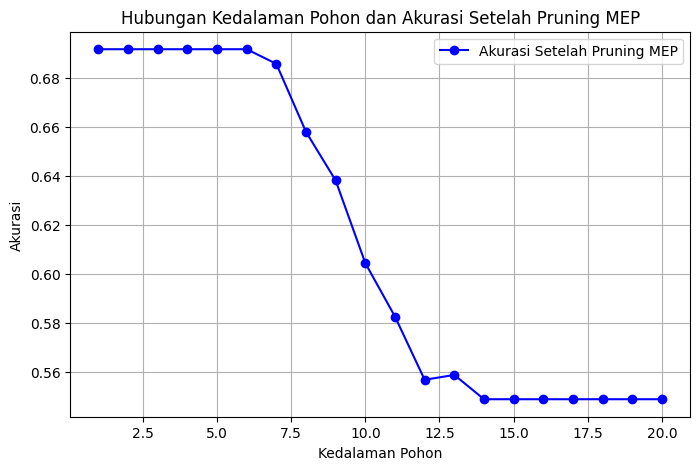

In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n
    if total == 0:
        return 0
    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1
    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def prune_mep(tree, X, y):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return Counter(y).most_common(1)[0][0]
    left_subtree = prune_mep(tree[feature_value][True], X[left_mask], y[left_mask])
    right_subtree = prune_mep(tree[feature_value][False], X[right_mask], y[right_mask])
    y_pred = np.array([predict(tree, row) for row in X])
    error_before = np.mean(y_pred != y)
    majority_class = Counter(y).most_common(1)[0][0]
    error_after = np.mean(y != majority_class)
    if error_after <= error_before:
        return majority_class
    return {feature_value: {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    branch = tree[feature_value][X[feature] == value]
    return predict(branch, X) if isinstance(branch, dict) else branch

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = []
accuracies_after = []

def evaluate_tree(max_depth):
    tree = build_tree(X_train.values, y_train, max_depth=max_depth)
    pruned_tree = prune_mep(tree, X_train.values, y_train)
    y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test.values])
    accuracy_after = accuracy_score(y_test, y_pred_pruned)
    print(f"Depth: {max_depth}, Accuracy After Pruning: {accuracy_after:.4f}")
    #print("\nClassification Report After Pruning:")
    #print(classification_report(y_test, y_pred_pruned))
    depths.append(max_depth)
    accuracies_after.append(accuracy_after)

for depth in range(1, 21):
    evaluate_tree(depth)

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_after, marker='o', linestyle='-', color='b', label='Akurasi Setelah Pruning MEP')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi Setelah Pruning MEP')
plt.legend()
plt.grid()
plt.show()


**ID3 Modifikasi menggunakan Estimasi Error setelah MEP**

Depth: 1, Accuracy After Pruning: 0.6918, Estimated Error: 0.3091
Depth: 2, Accuracy After Pruning: 0.6918, Estimated Error: 0.3091
Depth: 3, Accuracy After Pruning: 0.6918, Estimated Error: 0.3091
Depth: 4, Accuracy After Pruning: 0.6918, Estimated Error: 0.3091
Depth: 5, Accuracy After Pruning: 0.6918, Estimated Error: 0.3091
Depth: 6, Accuracy After Pruning: 0.6918, Estimated Error: 0.3091
Depth: 7, Accuracy After Pruning: 0.6859, Estimated Error: 0.3151
Depth: 8, Accuracy After Pruning: 0.6581, Estimated Error: 0.3429
Depth: 9, Accuracy After Pruning: 0.6382, Estimated Error: 0.3628
Depth: 10, Accuracy After Pruning: 0.6044, Estimated Error: 0.3966
Depth: 11, Accuracy After Pruning: 0.5825, Estimated Error: 0.4185
Depth: 12, Accuracy After Pruning: 0.5567, Estimated Error: 0.4443
Depth: 13, Accuracy After Pruning: 0.5586, Estimated Error: 0.4423
Depth: 14, Accuracy After Pruning: 0.5487, Estimated Error: 0.4523
Depth: 15, Accuracy After Pruning: 0.5487, Estimated Error: 0.4523
Dept

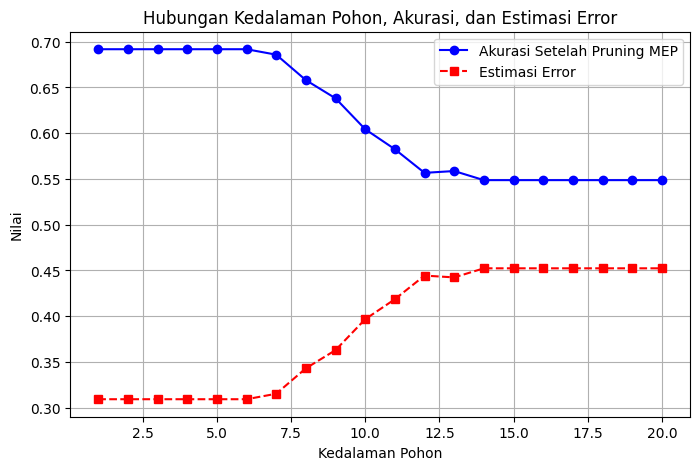

In [17]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n
    if total == 0:
        return 0
    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1
    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def estimate_error(n, e):
    return (e + 0.5) / n if n > 0 else 0

def prune_mep(tree, X, y):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return Counter(y).most_common(1)[0][0]
    left_subtree = prune_mep(tree[feature_value][True], X[left_mask], y[left_mask])
    right_subtree = prune_mep(tree[feature_value][False], X[right_mask], y[right_mask])
    y_pred = np.array([predict(tree, row) for row in X])
    error_before = np.mean(y_pred != y)
    majority_class = Counter(y).most_common(1)[0][0]
    error_after = np.mean(y != majority_class)
    E_before = estimate_error(len(y), error_before * len(y))
    E_after = estimate_error(len(y), error_after * len(y))
    if E_after <= E_before:
        return majority_class
    return {feature_value: {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    branch = tree[feature_value][X[feature] == value]
    return predict(branch, X) if isinstance(branch, dict) else branch

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = []
accuracies_after = []
errors = []

def evaluate_tree(max_depth):
    tree = build_tree(X_train.values, y_train, max_depth=max_depth)
    pruned_tree = prune_mep(tree, X_train.values, y_train)
    y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test.values])
    accuracy_after = accuracy_score(y_test, y_pred_pruned)
    error_rate = np.mean(y_pred_pruned != y_test)
    estimated_error = estimate_error(len(y_test), error_rate * len(y_test))
    print(f"Depth: {max_depth}, Accuracy After Pruning: {accuracy_after:.4f}, Estimated Error: {estimated_error:.4f}")
    depths.append(max_depth)
    accuracies_after.append(accuracy_after)
    errors.append(estimated_error)

for depth in range(1, 21):
    evaluate_tree(depth)

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_after, marker='o', linestyle='-', color='b', label='Akurasi Setelah Pruning MEP')
plt.plot(depths, errors, marker='s', linestyle='--', color='r', label='Estimasi Error')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Nilai')
plt.title('Hubungan Kedalaman Pohon, Akurasi, dan Estimasi Error')
plt.legend()
plt.grid()
plt.show()

**Laporan Klasifikasi ID3 Modifikasi setelah MEP**

In [19]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n
    if total == 0:
        return 0
    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1
    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=6):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def estimate_error(n, e):
    return (e + 0.5) / n if n > 0 else 0

def prune_mep(tree, X, y):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return Counter(y).most_common(1)[0][0]
    left_subtree = prune_mep(tree[feature_value][True], X[left_mask], y[left_mask])
    right_subtree = prune_mep(tree[feature_value][False], X[right_mask], y[right_mask])
    y_pred = np.array([predict(tree, row) for row in X])
    error_before = np.mean(y_pred != y)
    majority_class = Counter(y).most_common(1)[0][0]
    error_after = np.mean(y != majority_class)
    if error_after <= error_before:
        return majority_class
    return {feature_value: {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = map(int, feature_value.split(" = "))
    branch = tree[feature_value][X[feature] == value]
    return predict(branch, X) if isinstance(branch, dict) else branch

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

start_time = time.time()
tree = build_tree(X_train.values, y_train, max_depth=6)
pruned_tree = prune_mep(tree, X_train.values, y_train)
y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test.values])
accuracy_after = accuracy_score(y_test, y_pred_pruned)
end_time = time.time()

print(f"Execution Time: {end_time - start_time:.4f} sec")
print(f"Accuracy After Pruning: {accuracy_after:.4f}")
print("\nClassification Report After Pruning:")
print(classification_report(y_test, y_pred_pruned))

Execution Time: 0.2197 sec
Accuracy After Pruning: 0.6844

Classification Report After Pruning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.68      1.00      0.81       516

    accuracy                           0.68       754
   macro avg       0.34      0.50      0.41       754
weighted avg       0.47      0.68      0.56       754



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Normalisasi Z-Score ID3 Shannon**

Max Depth: 1, Execution Time: 0.0005 sec, Accuracy: 0.6844
Max Depth: 2, Execution Time: 0.0090 sec, Accuracy: 0.6844
Max Depth: 3, Execution Time: 0.0196 sec, Accuracy: 0.6844
Max Depth: 4, Execution Time: 0.0381 sec, Accuracy: 0.6844
Max Depth: 5, Execution Time: 0.0704 sec, Accuracy: 0.6631
Max Depth: 6, Execution Time: 0.1310 sec, Accuracy: 0.6724
Max Depth: 7, Execution Time: 0.1972 sec, Accuracy: 0.6684
Max Depth: 8, Execution Time: 0.3994 sec, Accuracy: 0.6432
Max Depth: 9, Execution Time: 0.5102 sec, Accuracy: 0.6008
Max Depth: 10, Execution Time: 0.6278 sec, Accuracy: 0.5968
Max Depth: 11, Execution Time: 0.8645 sec, Accuracy: 0.5928
Max Depth: 12, Execution Time: 0.9955 sec, Accuracy: 0.5769
Max Depth: 13, Execution Time: 0.7483 sec, Accuracy: 0.5517
Max Depth: 14, Execution Time: 0.8182 sec, Accuracy: 0.5570
Max Depth: 15, Execution Time: 0.8255 sec, Accuracy: 0.5663
Max Depth: 16, Execution Time: 0.9021 sec, Accuracy: 0.5716
Max Depth: 17, Execution Time: 0.8535 sec, Accura

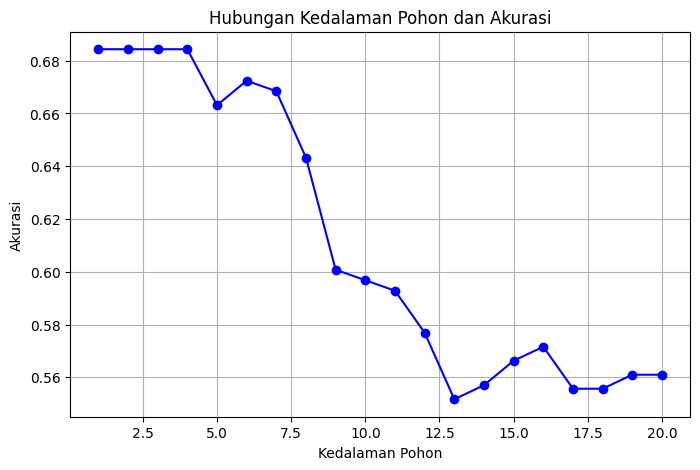

In [25]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])

        for value in values:
            left_mask = X[:, feature] <= value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] <= value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} <= {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, row):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" <= ")
    feature = int(feature)
    value = float(value)

    subtree = tree[list(tree.keys())[0]][row[feature] <= value]
    return predict(subtree, row) if isinstance(subtree, dict) else subtree

# Load dataset
def load_data(url):
    data = pd.read_csv(url)
    return data

# Ganti dengan jalur dataset Anda
url = 'toko_online.csv'
data = load_data(url)

# Preprocessing
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding dan normalisasi
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluasi model
depths = []
accuracies = []
for max_depth in range(1, 21):
    start_time = time.time()
    tree = build_tree(X_train, y_train, max_depth=max_depth)
    end_time = time.time()

    y_pred = np.array([predict(tree, row) for row in X_test])
    accuracy = accuracy_score(y_test, y_pred)

    depths.append(max_depth)
    accuracies.append(accuracy)
    print(f"Max Depth: {max_depth}, Execution Time: {end_time - start_time:.4f} sec, Accuracy: {accuracy:.4f}")

# Plot hasil
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi')
plt.grid()
plt.show()

**Laporam Klasifikasi ID3 Shannon menggunakan normalisasi Z-Score**

In [23]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])

        for value in values:
            left_mask = X[:, feature] <= value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] <= value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} <= {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, row):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" <= ")
    feature = int(feature)
    value = float(value)

    subtree = tree[list(tree.keys())[0]][row[feature] <= value]
    return predict(subtree, row) if isinstance(subtree, dict) else subtree

# Load dataset
def load_data(url):
    data = pd.read_csv(url)
    return data

# Ganti dengan jalur dataset Anda
url = 'toko_online.csv'
data = load_data(url)

# Preprocessing
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding dan normalisasi
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun pohon dengan kedalaman maksimum = 6
max_depth = 6
start_time = time.time()
tree = build_tree(X_train, y_train, max_depth=max_depth)
end_time = time.time()

# Prediksi dan evaluasi model
y_pred = np.array([predict(tree, row) for row in X_test])
accuracy = accuracy_score(y_test, y_pred)

print(f"Execution Time: {end_time - start_time:.4f} sec")
print(f"Accuracy at Depth {max_depth}: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Execution Time: 0.1229 sec
Accuracy at Depth 6: 0.6998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       155
           1       0.70      1.00      0.82       348

    accuracy                           0.70       503
   macro avg       0.85      0.51      0.44       503
weighted avg       0.79      0.70      0.58       503



**ID3 Modifikasi menggunakan normalisasi Z-Score**

Max Depth: 1, Execution Time: 0.0008 seconds, Accuracy: 0.6844
Max Depth: 2, Execution Time: 0.0095 seconds, Accuracy: 0.6844
Max Depth: 3, Execution Time: 0.0231 seconds, Accuracy: 0.6844
Max Depth: 4, Execution Time: 0.0461 seconds, Accuracy: 0.6844
Max Depth: 5, Execution Time: 0.0844 seconds, Accuracy: 0.6844
Max Depth: 6, Execution Time: 0.1574 seconds, Accuracy: 0.6844
Max Depth: 7, Execution Time: 0.2936 seconds, Accuracy: 0.6631
Max Depth: 8, Execution Time: 0.4616 seconds, Accuracy: 0.6260
Max Depth: 9, Execution Time: 0.7042 seconds, Accuracy: 0.6326
Max Depth: 10, Execution Time: 0.9090 seconds, Accuracy: 0.5902
Max Depth: 11, Execution Time: 1.0810 seconds, Accuracy: 0.5729
Max Depth: 12, Execution Time: 1.2075 seconds, Accuracy: 0.5663
Max Depth: 13, Execution Time: 1.7521 seconds, Accuracy: 0.5637
Max Depth: 14, Execution Time: 1.9709 seconds, Accuracy: 0.5623
Max Depth: 15, Execution Time: 1.2693 seconds, Accuracy: 0.5623
Max Depth: 16, Execution Time: 1.2712 seconds, Ac

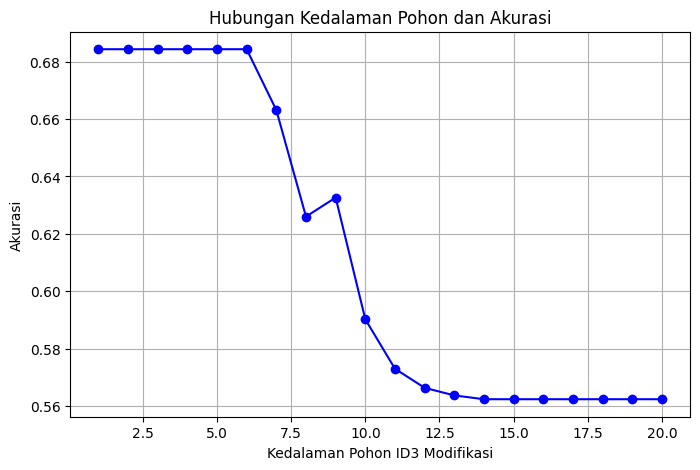

In [15]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n

    if total == 0:
        return 0

    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1

    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, row):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)
    value = float(value)  # Pastikan nilai yang dibandingkan sesuai dengan tipe data dari dataset

    subtree = tree[list(tree.keys())[0]][row[feature] == value]
    return predict(subtree, row) if isinstance(subtree, dict) else subtree

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding dan normalisasi
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Konversi y_train ke NumPy array dengan tipe int
y_train = np.array(y_train, dtype=int)

# Evaluasi model pada berbagai kedalaman
depths = []
accuracies = []

for max_depth in range(1, 21):
    start_time = time.time()
    tree = build_tree(X_train, y_train, max_depth=max_depth)
    end_time = time.time()

    y_pred = np.array([predict(tree, row) for row in X_test])
    accuracy = accuracy_score(y_test, y_pred)

    depths.append(max_depth)
    accuracies.append(accuracy)

    print(f"Max Depth: {max_depth}, Execution Time: {end_time - start_time:.4f} seconds, Accuracy: {accuracy:.4f}")

# Plot hasil
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Kedalaman Pohon ID3 Modifikasi')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi')
plt.grid()
plt.show()


**Laporan Klasifikasi ID3 Modifikasi Normalisasi Z-Score**

In [29]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n

    if total == 0:
        return 0

    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1

    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=6):  # Tetapkan kedalaman maksimum 6
    if len(set(y)) == 1:
        return y[0]

    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, row):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)
    value = float(value)

    subtree = tree[list(tree.keys())[0]][row[feature] == value]
    return predict(subtree, row) if isinstance(subtree, dict) else subtree

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding dan normalisasi
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Konversi y_train ke NumPy array dengan tipe int
y_train = np.array(y_train, dtype=int)

# Membangun pohon keputusan dengan kedalaman tetap 6
start_time = time.time()
tree = build_tree(X_train, y_train, max_depth=6)
end_time = time.time()

# Melakukan prediksi
y_pred = np.array([predict(tree, row) for row in X_test])

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExecution Time: {end_time - start_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Execution Time: 0.2589 seconds
Accuracy: 0.6844

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.68      1.00      0.81       516

    accuracy                           0.68       754
   macro avg       0.34      0.50      0.41       754
weighted avg       0.47      0.68      0.56       754



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Grafik terhadap Akurasi sesudah dan Sebelum Normalisasi pada ID3**

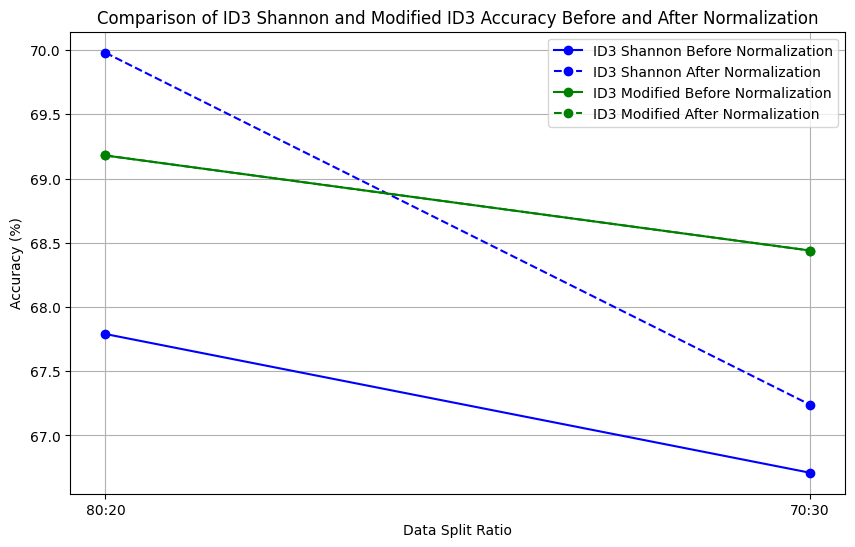

In [18]:
import matplotlib.pyplot as plt

# Data Akurasi
split_ratios = ['80:20', '70:30']
id3_shannon_before = [67.79, 66.71]
id3_shannon_after = [69.98, 67.24]
id3_modified_before = [69.18, 68.44]
id3_modified_after = [69.18, 68.44]

# Plotting grafik garis
plt.figure(figsize=(10, 6))

# ID3 Shannon
plt.plot(split_ratios, id3_shannon_before, label='ID3 Shannon Before Normalization', marker='o', color='blue')
plt.plot(split_ratios, id3_shannon_after, label='ID3 Shannon After Normalization', marker='o', linestyle='--', color='blue')

# ID3 Modifikasi
plt.plot(split_ratios, id3_modified_before, label='ID3 Modified Before Normalization', marker='o', color='green')
plt.plot(split_ratios, id3_modified_after, label='ID3 Modified After Normalization', marker='o', linestyle='--', color='green')

# Menambahkan label dan judul
plt.xlabel('Data Split Ratio')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of ID3 Shannon and Modified ID3 Accuracy Before and After Normalization')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()


**Normalisasi ID3 Shannon setelah Pruning MEP**

Depth: 1, Time: 0.0014 sec, Accuracy After Pruning: 0.6844
Depth: 2, Time: 0.0113 sec, Accuracy After Pruning: 0.6844
Depth: 3, Time: 0.0246 sec, Accuracy After Pruning: 0.6844
Depth: 4, Time: 0.0400 sec, Accuracy After Pruning: 0.6844
Depth: 5, Time: 0.0584 sec, Accuracy After Pruning: 0.6844
Depth: 6, Time: 0.0899 sec, Accuracy After Pruning: 0.6844
Depth: 7, Time: 0.1072 sec, Accuracy After Pruning: 0.6844
Depth: 8, Time: 0.1556 sec, Accuracy After Pruning: 0.6844
Depth: 9, Time: 0.1608 sec, Accuracy After Pruning: 0.6844
Depth: 10, Time: 0.1906 sec, Accuracy After Pruning: 0.6844
Depth: 11, Time: 0.2289 sec, Accuracy After Pruning: 0.6844
Depth: 12, Time: 0.2699 sec, Accuracy After Pruning: 0.6844
Depth: 13, Time: 0.3186 sec, Accuracy After Pruning: 0.6844
Depth: 14, Time: 0.3390 sec, Accuracy After Pruning: 0.6844
Depth: 15, Time: 0.3743 sec, Accuracy After Pruning: 0.6844
Depth: 16, Time: 0.4299 sec, Accuracy After Pruning: 0.6844
Depth: 17, Time: 0.4853 sec, Accuracy After Pruni

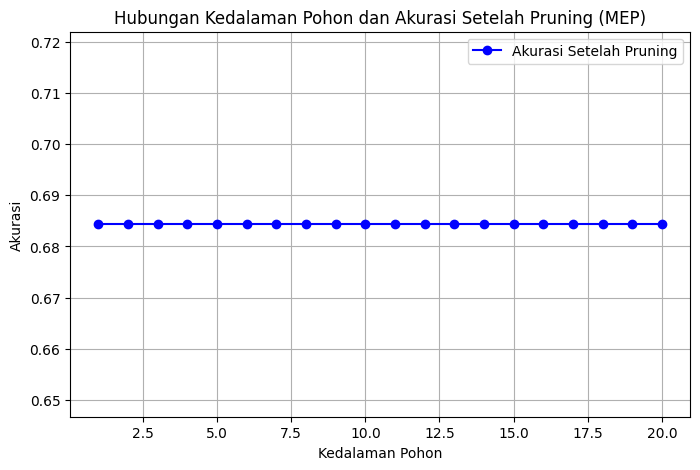

In [22]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)

            info_gain = base_entropy - weighted_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)

    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]

    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]

    feature, value = split
    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return {f"{feature} = {value:.6f}": {True: left_subtree, False: right_subtree}}

def prune_tree(tree, X, y):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)  # Pastikan fitur tetap integer
    value = float(value)  # Pastikan nilai tetap float

    left_mask = X[:, feature] == value
    right_mask = ~left_mask

    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return tree

    left_subtree = prune_tree(tree[list(tree.keys())[0]][True], X[left_mask], y[left_mask])
    right_subtree = prune_tree(tree[list(tree.keys())[0]][False], X[right_mask], y[right_mask])

    if not isinstance(left_subtree, dict) and not isinstance(right_subtree, dict):
        most_common_label = Counter(y).most_common(1)[0][0]
        return most_common_label

    return {f"{feature} = {value:.6f}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree

    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)  # Pastikan fitur tetap integer
    value = float(value)  # Pastikan nilai tetap float

    subtree = tree[list(tree.keys())[0]][X[feature] == value]
    return predict(subtree, X) if isinstance(subtree, dict) else subtree

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = []
accuracies_after = []

for max_depth in range(1, 21):
    start_time = time.time()
    tree = build_tree(X_train, y_train, max_depth=max_depth)
    pruned_tree = prune_tree(tree, X_train, y_train)
    y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test])
    accuracy_after = accuracy_score(y_test, y_pred_pruned)
    end_time = time.time()

    depths.append(max_depth)
    accuracies_after.append(accuracy_after)

    print(f"Depth: {max_depth}, Time: {end_time - start_time:.4f} sec, Accuracy After Pruning: {accuracy_after:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_after, marker='o', linestyle='-', color='b', label='Akurasi Setelah Pruning')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Hubungan Kedalaman Pohon dan Akurasi Setelah Pruning (MEP)')
plt.legend()
plt.grid()
plt.show()


In [38]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    split = best_split(X, y)
    if split is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = split
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value:.6f}": {True: left_subtree, False: right_subtree}}

def prune_tree(tree, X, y):
    if not isinstance(tree, dict):
        return tree
    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)
    value = float(value)
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return tree
    left_subtree = prune_tree(tree[list(tree.keys())[0]][True], X[left_mask], y[left_mask])
    right_subtree = prune_tree(tree[list(tree.keys())[0]][False], X[right_mask], y[right_mask])
    if not isinstance(left_subtree, dict) and not isinstance(right_subtree, dict):
        return Counter(y).most_common(1)[0][0]
    return {f"{feature} = {value:.6f}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature, value = list(tree.keys())[0].split(" = ")
    feature = int(feature)
    value = float(value)
    subtree = tree[list(tree.keys())[0]][X[feature] == value]
    return predict(subtree, X) if isinstance(subtree, dict) else subtree

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
start_time = time.time()
tree = build_tree(X_train, y_train, max_depth=20)
pruned_tree = prune_tree(tree, X_train, y_train)
y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test])
accuracy_after = accuracy_score(y_test, y_pred_pruned)
end_time = time.time()
print(f"Waktu Eksekusi: {end_time - start_time:.4f} sec")
print(f"Akurasi Setelah Pruning: {accuracy_after:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_pruned))

Waktu Eksekusi: 0.5579 sec
Akurasi Setelah Pruning: 0.6844

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.68      1.00      0.81       516

    accuracy                           0.68       754
   macro avg       0.34      0.50      0.41       754
weighted avg       0.47      0.68      0.56       754



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Normalisasi ID3 Modifikasi setelah Pruning**

Depth: 1, Accuracy After Pruning: 0.6844, Estimated Error: 0.3163
Depth: 2, Accuracy After Pruning: 0.6844, Estimated Error: 0.3163
Depth: 3, Accuracy After Pruning: 0.6844, Estimated Error: 0.3163
Depth: 4, Accuracy After Pruning: 0.6844, Estimated Error: 0.3163
Depth: 5, Accuracy After Pruning: 0.6844, Estimated Error: 0.3163
Depth: 6, Accuracy After Pruning: 0.6844, Estimated Error: 0.3163
Depth: 7, Accuracy After Pruning: 0.6751, Estimated Error: 0.3256
Depth: 8, Accuracy After Pruning: 0.6393, Estimated Error: 0.3614
Depth: 9, Accuracy After Pruning: 0.6366, Estimated Error: 0.3641
Depth: 10, Accuracy After Pruning: 0.6048, Estimated Error: 0.3959
Depth: 11, Accuracy After Pruning: 0.5676, Estimated Error: 0.4330
Depth: 12, Accuracy After Pruning: 0.5756, Estimated Error: 0.4251
Depth: 13, Accuracy After Pruning: 0.5610, Estimated Error: 0.4397
Depth: 14, Accuracy After Pruning: 0.5623, Estimated Error: 0.4383
Depth: 15, Accuracy After Pruning: 0.5623, Estimated Error: 0.4383
Dept

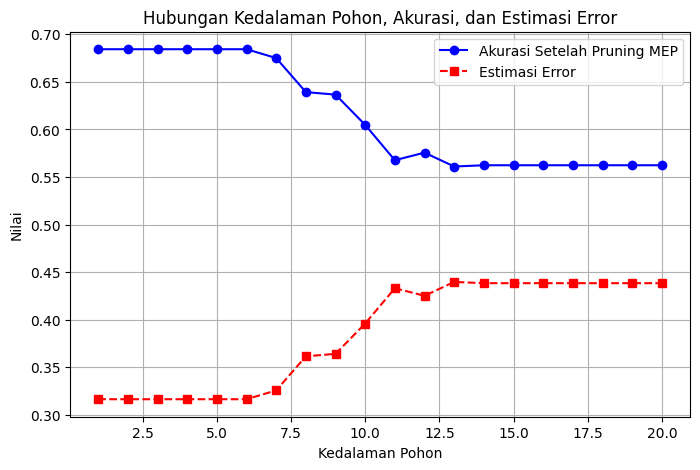

In [20]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n
    if total == 0:
        return 0
    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1
    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=20):
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def estimate_error(n, e):
    return (e + 0.5) / n if n > 0 else 0

def prune_mep(tree, X, y):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]

    # Pisahkan fitur dan nilai dengan hati-hati untuk menghindari error konversi
    feature, value = feature_value.split(" = ")
    feature = int(feature)  # Fitur tetap integer
    value = float(value)  # Nilai fitur diubah ke float

    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return Counter(y).most_common(1)[0][0]
    left_subtree = prune_mep(tree[feature_value][True], X[left_mask], y[left_mask])
    right_subtree = prune_mep(tree[feature_value][False], X[right_mask], y[right_mask])

    y_pred = np.array([predict(tree, row) for row in X])
    error_before = np.mean(y_pred != y)
    majority_class = Counter(y).most_common(1)[0][0]
    error_after = np.mean(y != majority_class)

    E_before = estimate_error(len(y), error_before * len(y))
    E_after = estimate_error(len(y), error_after * len(y))

    if E_after <= E_before:
        return majority_class
    return {feature_value: {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]

    # Pisahkan fitur dan nilai dengan hati-hati untuk menghindari error konversi
    feature, value = feature_value.split(" = ")
    feature = int(feature)  # Fitur tetap integer
    value = float(value)  # Nilai fitur diubah ke float

    branch = tree[feature_value][X[feature] == value]
    return predict(branch, X) if isinstance(branch, dict) else branch

def load_data(url):
    return pd.read_csv(url)

url = 'toko_online.csv'
data = load_data(url)
X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding dan normalisasi
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = []
accuracies_after = []
errors = []

def evaluate_tree(max_depth):
    tree = build_tree(X_train, y_train, max_depth=max_depth)
    pruned_tree = prune_mep(tree, X_train, y_train)
    y_pred_pruned = np.array([predict(pruned_tree, row) for row in X_test])
    accuracy_after = accuracy_score(y_test, y_pred_pruned)
    error_rate = np.mean(y_pred_pruned != y_test)
    estimated_error = estimate_error(len(y_test), error_rate * len(y_test))
    print(f"Depth: {max_depth}, Accuracy After Pruning: {accuracy_after:.4f}, Estimated Error: {estimated_error:.4f}")
    depths.append(max_depth)
    accuracies_after.append(accuracy_after)
    errors.append(estimated_error)

for depth in range(1, 21):
    evaluate_tree(depth)

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_after, marker='o', linestyle='-', color='b', label='Akurasi Setelah Pruning MEP')
plt.plot(depths, errors, marker='s', linestyle='--', color='r', label='Estimasi Error')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Nilai')
plt.title('Hubungan Kedalaman Pohon, Akurasi, dan Estimasi Error')
plt.legend()
plt.grid()
plt.show()


**Laporan Klasifikasi pada Normalisasi ID3 Modifikasi setelah MEP**

In [40]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def entropy(y):
    p = np.sum(y == 1)
    n = np.sum(y == 0)
    total = p + n
    if total == 0:
        return 0
    p_ratio = p / total if p > 0 else 1
    n_ratio = n / total if n > 0 else 1
    return (1 / np.log(2)) * (np.log(total) - ((p * np.log(p_ratio) + n * np.log(n_ratio)) / total))

def best_split(X, y):
    best_gain = 0
    best_feature = None
    base_entropy = entropy(y)
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left_mask = X[:, feature] == value
            right_mask = ~left_mask
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
            info_gain = base_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (feature, value)
    return best_feature

def build_tree(X, y, depth=1, max_depth=6):  # Tetapkan max_depth = 6
    if len(set(y)) == 1:
        return y[0]
    if X.shape[1] == 0 or depth >= max_depth:
        return Counter(y).most_common(1)[0][0]
    feature_value = best_split(X, y)
    if feature_value is None:
        return Counter(y).most_common(1)[0][0]
    feature, value = feature_value
    left_mask = X[:, feature] == value
    right_mask = ~left_mask
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return {f"{feature} = {value}": {True: left_subtree, False: right_subtree}}

def predict(tree, X):
    if not isinstance(tree, dict):
        return tree
    feature_value = list(tree.keys())[0]
    feature, value = feature_value.split(" = ")
    feature = int(feature)
    value = float(value)
    branch = tree[feature_value][X[feature] == value]
    return predict(branch, X) if isinstance(branch, dict) else branch

# Load data
url = 'toko_online.csv'
data = pd.read_csv(url)

X = data[['Gender', 'Marital_status', 'State_names', 'Segment', 'Employees_status',
          'Payment_method', 'Amount_spent_Range', 'Age_Range']]
y = data['Referal']

# Encoding dan normalisasi
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bangun pohon dengan max_depth = 6
start_time = time.time()
tree = build_tree(X_train, y_train, max_depth=6)
y_pred = np.array([predict(tree, row) for row in X_test])
accuracy = accuracy_score(y_test, y_pred)
end_time = time.time()

# Cetak hasil evaluasi
print(f"Accuracy After Pruning (Depth=6): {accuracy:.4f}")
print(f"Processing Time: {end_time - start_time:.4f} sec")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy After Pruning (Depth=6): 0.6844
Processing Time: 0.1637 sec

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.68      1.00      0.81       516

    accuracy                           0.68       754
   macro avg       0.34      0.50      0.41       754
weighted avg       0.47      0.68      0.56       754



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Grafik Normalisasi MEP pada ID3**

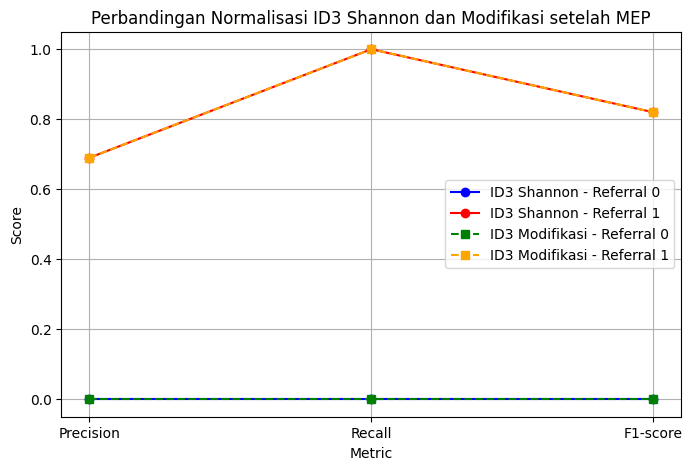

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Data metric
metrics = ["Precision", "Recall", "F1-score"]
id3_shannon_0 = [0.00, 0.00, 0.00]
id3_shannon_1 = [0.69, 1.00, 0.82]
id3_mod_0 = [0.00, 0.00, 0.00]
id3_mod_1 = [0.69, 1.00, 0.82]

# Plot
plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
plt.plot(x, id3_shannon_0, marker='o', linestyle='-', label='ID3 Shannon - Referral 0', color='b')
plt.plot(x, id3_shannon_1, marker='o', linestyle='-', label='ID3 Shannon - Referral 1', color='r')
plt.plot(x, id3_mod_0, marker='s', linestyle='--', label='ID3 Modifikasi - Referral 0', color='g')
plt.plot(x, id3_mod_1, marker='s', linestyle='--', label='ID3 Modifikasi - Referral 1', color='orange')

# Labels dan title
plt.xticks(x, metrics)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Perbandingan Normalisasi ID3 Shannon dan Modifikasi setelah MEP")
plt.legend()
plt.grid()
plt.show()

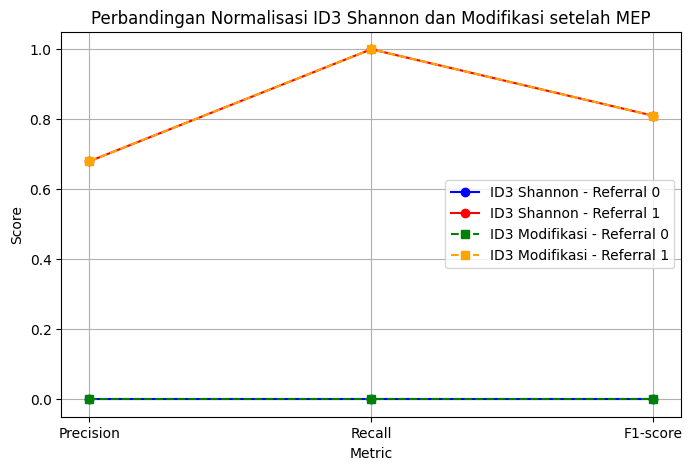

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Data metric
metrics = ["Precision", "Recall", "F1-score"]
id3_shannon_0 = [0.00, 0.00, 0.00]
id3_shannon_1 = [0.68, 1.00, 0.81]
id3_mod_0 = [0.00, 0.00, 0.00]
id3_mod_1 = [0.68, 1.00, 0.81]

# Plot
plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
plt.plot(x, id3_shannon_0, marker='o', linestyle='-', label='ID3 Shannon - Referral 0', color='b')
plt.plot(x, id3_shannon_1, marker='o', linestyle='-', label='ID3 Shannon - Referral 1', color='r')
plt.plot(x, id3_mod_0, marker='s', linestyle='--', label='ID3 Modifikasi - Referral 0', color='g')
plt.plot(x, id3_mod_1, marker='s', linestyle='--', label='ID3 Modifikasi - Referral 1', color='orange')

# Labels dan title
plt.xticks(x, metrics)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Perbandingan Normalisasi ID3 Shannon dan Modifikasi setelah MEP")
plt.legend()
plt.grid()
plt.show()

**Grafik Kedalaman Pohon**

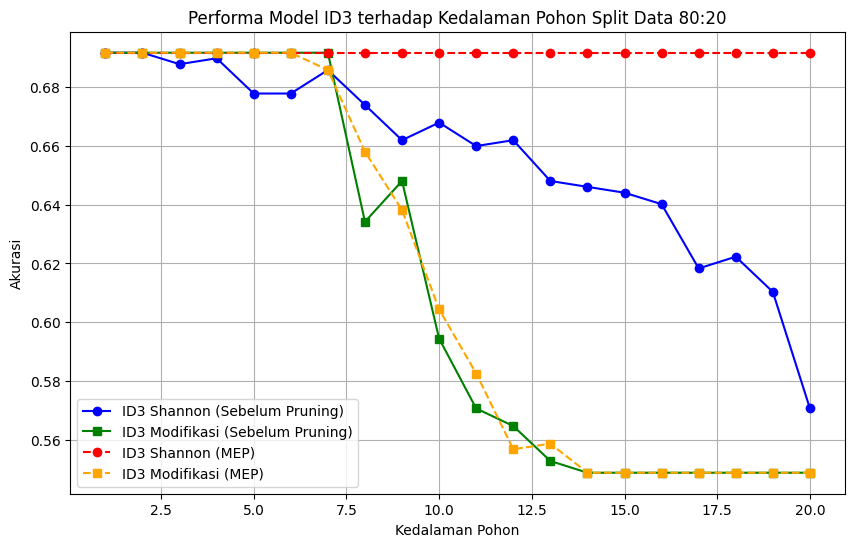

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Data kedalaman pohon dan akurasi
kedalaman = np.arange(1, 21)
sebelum_pruning_id3_shannon = [0.6918, 0.6918, 0.6879, 0.6899, 0.6779, 0.6779, 0.6859, 0.6740, 0.6620, 0.6680, 0.6600, 0.6620, 0.6481, 0.6461, 0.6441, 0.6402, 0.6183, 0.6223, 0.6103, 0.5706]
sebelum_pruning_id3_modifikasi = [0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6342, 0.6481, 0.5944, 0.5706, 0.5646, 0.5527, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487]
mep_pruning_id3_shannon = [0.6918] * 20
mep_pruning_id3_modifikasi = [0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6859, 0.6581, 0.6382, 0.6044, 0.5825, 0.5567, 0.5586, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487]

# Plot grafik
plt.figure(figsize=(10, 6))
plt.plot(kedalaman, sebelum_pruning_id3_shannon, marker='o', linestyle='-', color='b', label='ID3 Shannon (Sebelum Pruning)')
plt.plot(kedalaman, sebelum_pruning_id3_modifikasi, marker='s', linestyle='-', color='g', label='ID3 Modifikasi (Sebelum Pruning)')
plt.plot(kedalaman, mep_pruning_id3_shannon, marker='o', linestyle='--', color='r', label='ID3 Shannon (MEP)')
plt.plot(kedalaman, mep_pruning_id3_modifikasi, marker='s', linestyle='--', color='orange', label='ID3 Modifikasi (MEP)')

plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Performa Model ID3 terhadap Kedalaman Pohon Split Data 80:20')
plt.legend()
plt.grid()
plt.show()

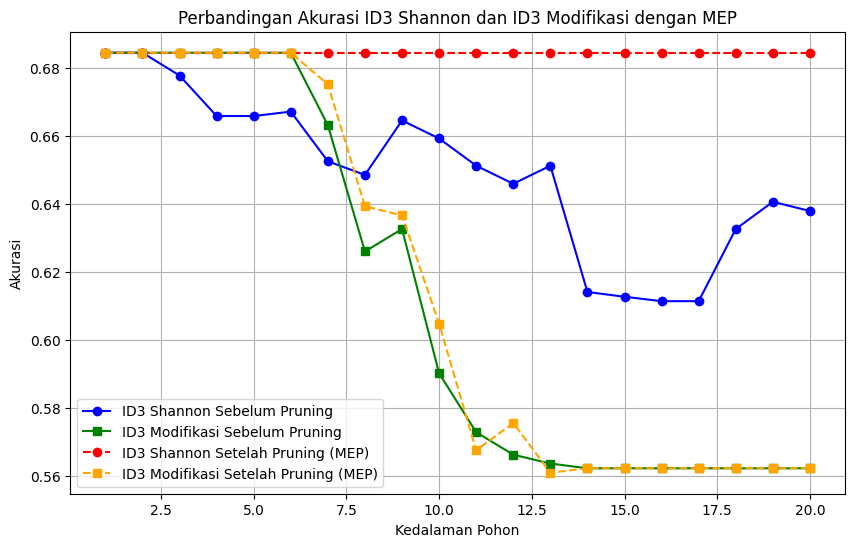

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data Kedalaman Pohon
kedalaman = np.arange(1, 21)

# Akurasi Sebelum Pruning
id3_shannon_sebelum = [0.6844, 0.6844, 0.6777, 0.6658, 0.6658, 0.6671, 0.6525, 0.6485, 0.6645, 0.6592,
                        0.6512, 0.6459, 0.6512, 0.6141, 0.6127, 0.6114, 0.6114, 0.6326, 0.6406, 0.6379]
id3_modifikasi_sebelum = [0.6844, 0.6844, 0.6844, 0.6844, 0.6844, 0.6844, 0.6631, 0.6260, 0.6326, 0.5902,
                           0.5729, 0.5663, 0.5637, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623]

# Akurasi Setelah Pruning
id3_shannon_mep = [0.6844] * 20
id3_modifikasi_mep = [0.6844] * 6 + [0.6751, 0.6393, 0.6366, 0.6048, 0.5676, 0.5756, 0.5610, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623]

# Membuat Plot
plt.figure(figsize=(10, 6))
plt.plot(kedalaman, id3_shannon_sebelum, marker='o', linestyle='-', label='ID3 Shannon Sebelum Pruning', color='b')
plt.plot(kedalaman, id3_modifikasi_sebelum, marker='s', linestyle='-', label='ID3 Modifikasi Sebelum Pruning', color='g')
plt.plot(kedalaman, id3_shannon_mep, marker='o', linestyle='--', label='ID3 Shannon Setelah Pruning (MEP)', color='r')
plt.plot(kedalaman, id3_modifikasi_mep, marker='s', linestyle='--', label='ID3 Modifikasi Setelah Pruning (MEP)', color='orange')

# Label dan Judul
plt.xlabel("Kedalaman Pohon")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi ID3 Shannon dan ID3 Modifikasi dengan MEP")
plt.legend()
plt.grid()
plt.show()

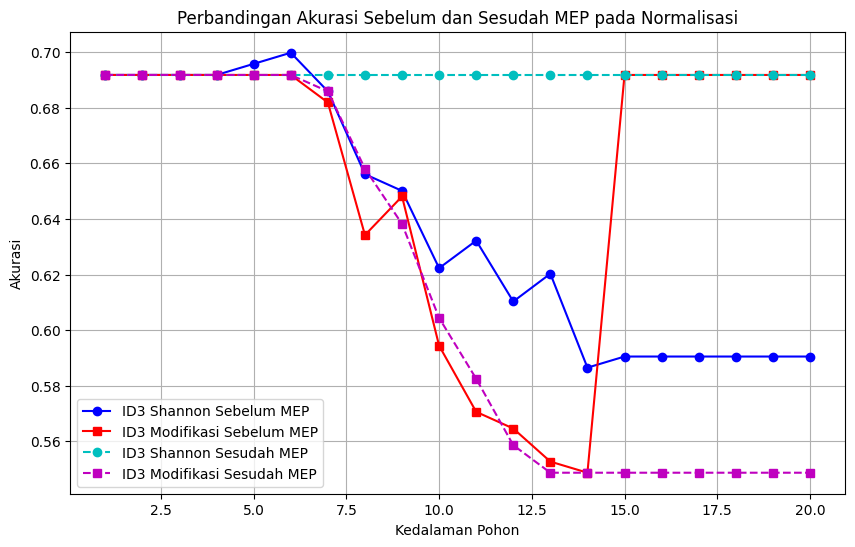

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data Kedalaman Pohon
kedalaman = np.arange(1, 21)

# Data Akurasi Sebelum MEP
id3_shannon_sebelum = [0.6918, 0.6918, 0.6918, 0.6918, 0.6958, 0.6998, 0.6859, 0.6561, 0.6501, 0.6223, 0.6322, 0.6103, 0.6203, 0.5865, 0.5905, 0.5905, 0.5905, 0.5905, 0.5905, 0.5905]
id3_modifikasi_sebelum = [0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6819, 0.6342, 0.6481, 0.5944, 0.5706, 0.5646, 0.5527, 0.5487, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918]

# Data Akurasi Sesudah MEP
id3_shannon_sesudah = [0.6918] * 20
id3_modifikasi_sesudah = [0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6918, 0.6859, 0.6581, 0.6382, 0.6044, 0.5825, 0.5586, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487, 0.5487]

# Plot Grafik
plt.figure(figsize=(10, 6))
plt.plot(kedalaman, id3_shannon_sebelum, marker='o', linestyle='-', color='b', label='ID3 Shannon Sebelum MEP')
plt.plot(kedalaman, id3_modifikasi_sebelum, marker='s', linestyle='-', color='r', label='ID3 Modifikasi Sebelum MEP')
plt.plot(kedalaman, id3_shannon_sesudah, marker='o', linestyle='--', color='c', label='ID3 Shannon Sesudah MEP')
plt.plot(kedalaman, id3_modifikasi_sesudah, marker='s', linestyle='--', color='m', label='ID3 Modifikasi Sesudah MEP')

# Label dan Judul
plt.xlabel("Kedalaman Pohon")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Sebelum dan Sesudah MEP pada Normalisasi")
plt.legend()
plt.grid()
plt.show()

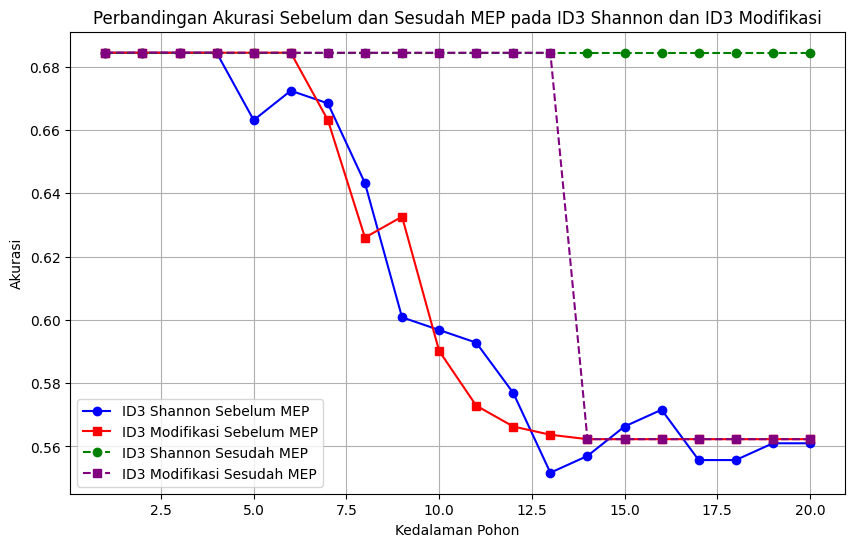

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari Tabel 6.13
kedalaman = np.arange(1, 21)
id3_shannon_sebelum = [0.6844, 0.6844, 0.6844, 0.6844, 0.6631, 0.6724, 0.6684, 0.6432, 0.6008, 0.5968,
                        0.5928, 0.5769, 0.5517, 0.5570, 0.5663, 0.5716, 0.5557, 0.5557, 0.5610, 0.5610]
id3_modifikasi_sebelum = [0.6844, 0.6844, 0.6844, 0.6844, 0.6844, 0.6844, 0.6631, 0.6260, 0.6326, 0.5902,
                           0.5729, 0.5663, 0.5637, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623, 0.5623]
id3_shannon_sesudah = [0.6844] * 20  # Nilai tetap setelah MEP
id3_modifikasi_sesudah = [0.6844] * 13 + [0.5623] * 7  # Stabil setelah kedalaman 14

# Plot grafik
plt.figure(figsize=(10, 6))
plt.plot(kedalaman, id3_shannon_sebelum, marker='o', linestyle='-', label='ID3 Shannon Sebelum MEP', color='blue')
plt.plot(kedalaman, id3_modifikasi_sebelum, marker='s', linestyle='-', label='ID3 Modifikasi Sebelum MEP', color='red')
plt.plot(kedalaman, id3_shannon_sesudah, marker='o', linestyle='--', label='ID3 Shannon Sesudah MEP', color='green')
plt.plot(kedalaman, id3_modifikasi_sesudah, marker='s', linestyle='--', label='ID3 Modifikasi Sesudah MEP', color='purple')

# Tambahkan label dan judul
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Sebelum dan Sesudah MEP pada ID3 Shannon dan ID3 Modifikasi')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()